Análise de usuários ficticios do serviço de assinatura Prime video

Bibliotecas utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Código para leitura de arquivo:

In [2]:
df = pd.read_csv('./amazon_prime_users.csv', na_values='na')

Verificação da leitura:

In [3]:
df.head(n=5)

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


Número de linhas e colunas:

In [4]:
df.shape

(2500, 19)

Tipo de informação em cada coluna:

In [5]:
df.dtypes

User ID                            int64
Name                              object
Email Address                     object
Username                          object
Date of Birth                     object
Gender                            object
Location                          object
Membership Start Date             object
Membership End Date               object
Subscription Plan                 object
Payment Information               object
Renewal Status                    object
Usage Frequency                   object
Purchase History                  object
Favorite Genres                   object
Devices Used                      object
Engagement Metrics                object
Feedback/Ratings                 float64
Customer Support Interactions      int64
dtype: object

Exploração de dados:

Verificando Dados Faltantes/Checking for Missing Data

In [15]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    dados_faltantes = False
    for col in df.columns:
        if df[col].isna().any():
            dados_faltantes = True
            qtd = df[col].isna().sum()
            total = len(df)
            dict_dados_faltantes = {col: {'Quantidade': qtd, 'Porcentagem': round(100 * qtd / total, 2)}}
            print(dict_dados_faltantes)
    if not dados_faltantes:
        print('Sem dados faltantes')

stats_dados_faltantes(df=df)

Sem dados faltantes


In [16]:

def calcular_idades(df):

    df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
    
    df['Idade'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year
    
    idade_minima = df['Idade'].min()
    idade_maxima = df['Idade'].max()
    
    return idade_minima, idade_maxima

idade_minima, idade_maxima = calcular_idades(df)

print(f"A idade do usuário mais novo é: {idade_minima} anos.")
print(f"A idade do usuário mais velho é: {idade_maxima} anos.")

A idade do usuário mais novo é: 18 anos.
A idade do usuário mais velho é: 91 anos.


In [69]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

ano_atual = pd.Timestamp.now().year
df['Idade'] = ano_atual - df['Date of Birth'].dt.year

media_idade = round(df['Idade'].mean())
print(f'A média da idade dos usuários é: {media_idade} Anos')

A média da idade dos usuários é: 55 Anos


In [73]:
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

df['Tempo de Assinatura'] = df['Membership End Date'] - df['Membership Start Date']

media_tempo_assinatura = df['Tempo de Assinatura'].mean()
print(f'A média de tempo que os usuários assinam a plataforma é de: {media_tempo_assinatura}')

A média de tempo que os usuários assinam a plataforma é de: 365 days 00:00:00


Visualização de dados:

In [49]:
sns.set_style('whitegrid') 

Convertendo a coluna 'Date of Birth' para o formato datetime e utilizando a função 'Timestamp.now().year' para acessar o ano atual e subtrair o ano de nascimento do usuário, obtendo assim sua idade.

In [98]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

ano_atual = pd.Timestamp.now().year
df['Idade'] = ano_atual - df['Date of Birth'].dt.year

media_idade = df['Idade'].mean()

Gráfico com a destribuição de idade dos usuários:

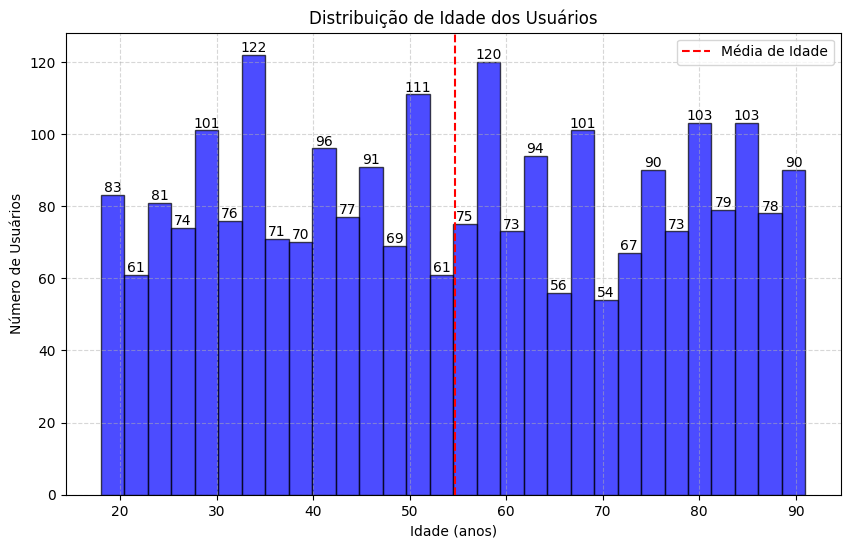

In [114]:
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df['Idade'], bins=30, alpha=0.7, color='blue', edgecolor='black')  
plt.axvline(media_idade, color='red', linestyle='--', label='Média de Idade')  

for i, bin_count in enumerate(n):
    if bin_count > 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, bin_count, str(int(bin_count)), ha='center', va='bottom', color='black')

plt.title('Distribuição de Idade dos Usuários')
plt.xlabel('Idade (anos)')
plt.ylabel('Número de Usuários')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()

Gráfico Tipo de plano de incrição

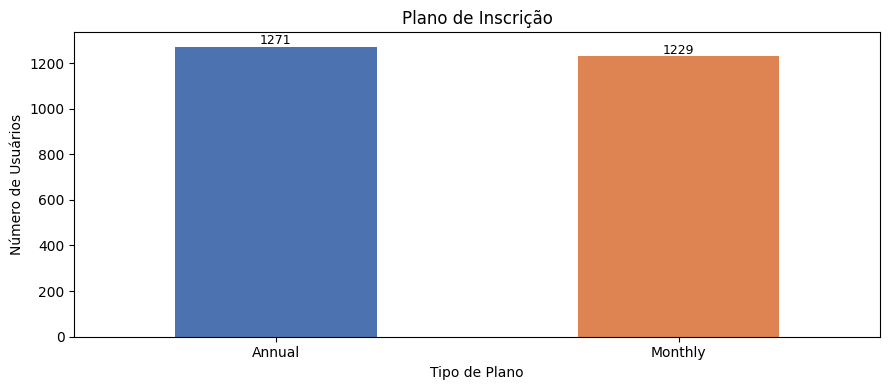

In [125]:
# Contagem dos planos de inscrição
plano_inscricao = df['Subscription Plan'].value_counts()

# Criando o gráfico de barras
palette = sns.color_palette("deep", len(plano_inscricao))
plt.figure(figsize=(9, 4))
ax = plano_inscricao.plot(kind='bar', color=palette)

# Adicionando os números totais acima de cada barra
for i, v in enumerate(plano_inscricao):
    ax.text(i, v + -1, str(v), ha='center', va='bottom', fontsize=9)  # Ajuste da posição vertical para aproximar dos valores das barras

# Configurações adicionais do gráfico
plt.title('Plano de Inscrição')
plt.xlabel('Tipo de Plano')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico de frequência de uso:

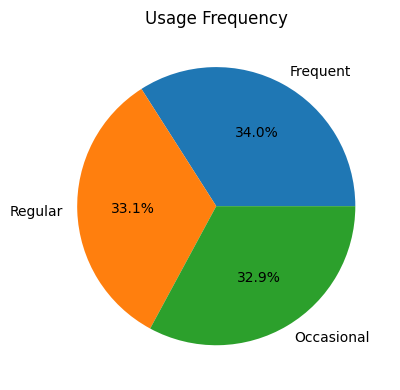

In [67]:
engajamento = df['Usage Frequency'].value_counts()
total = engajamento.sum()
palette = sns.color_palette("deep", len(engajamento))
plt.figure(figsize=(9, 4))
engajamento.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Usage Frequency')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

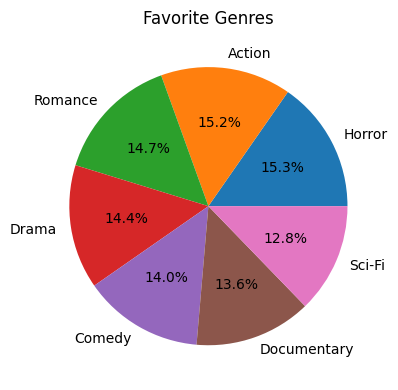

In [70]:
genero_favorito = df['Favorite Genres'].value_counts()
total = genero_favorito.sum()
palette = sns.color_palette("deep", len(genero_favorito))
plt.figure(figsize=(9, 4))
genero_favorito.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Favorite Genres')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Devices Used

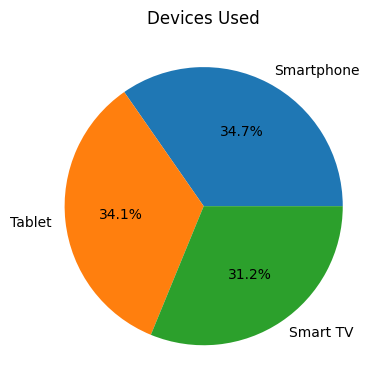

In [69]:
dispositivos_usados = df['Devices Used'].value_counts()
total = dispositivos_usados.sum()
palette = sns.color_palette("deep", len(dispositivos_usados))
plt.figure(figsize=(9, 4))
dispositivos_usados.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Devices Used')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Engagement Metrics

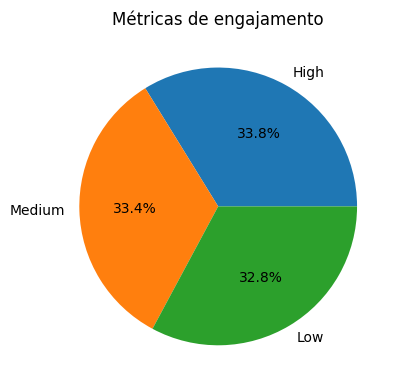

In [49]:
engajamento = df['Engagement Metrics'].value_counts()
total = engajamento.sum()
palette = sns.color_palette("deep", len(engajamento))
plt.figure(figsize=(9, 4))
engajamento.plot(kind='pie', color=palette, autopct='%0.1f%%')

plt.title('Métricas de engajamento')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()

Feedback/Ratings

Customer Support Interactions

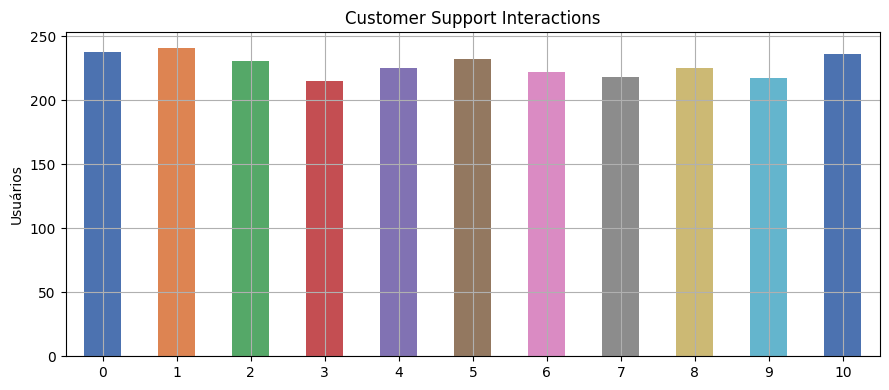

In [74]:
customer_support_interactions = df['Customer Support Interactions'].value_counts().sort_index()
palette = sns.color_palette("deep", len(customer_support_interactions))

plt.figure(figsize=(9, 4))
customer_support_interactions.plot(kind='bar', color=palette)

plt.title('Customer Support Interactions')
plt.xlabel('')
plt.ylabel('Usuários')

plt.grid(True)
plt.xticks(rotation=0) 
plt.tight_layout()  
plt.show()